<a href="https://colab.research.google.com/github/kurmapu767/kurmapu767/blob/main/decision%20tree%20sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
upload= files.upload()

Saving sales.csv to sales.csv


In [21]:
import pandas as pd
import numpy as np
df= pd.read_csv("sales.csv")
df.dtypes

Unnamed: 0      int64
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
high           object
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["Urban"]=le.fit_transform(df["Urban"])
df["US"]=le.fit_transform(df["US"])
df["high"]=le.fit_transform(df["high"])

In [24]:
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,0,42,17,1,1,1
1,2,111,48,16,260,83,1,65,10,1,1,1
2,3,113,35,10,269,80,2,59,12,1,1,1
3,4,117,100,4,466,97,2,55,14,1,1,0
4,5,141,64,3,340,128,0,38,13,1,0,0


In [27]:
y=df["high"]
x=df.iloc[:,1:-1]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)



from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [42]:
y_pred_train=dtc.predict(x_train)
y_pred_test=dtc.predict(x_test)
from sklearn.metrics import accuracy_score
atrain=accuracy_score(y_train,y_pred_train)
atest=accuracy_score(y_test,y_pred_test)
atrain,atest

(0.9607142857142857, 0.8083333333333333)

In [38]:
dtc.tree_.node_count

dtc.tree_.max_depth

9

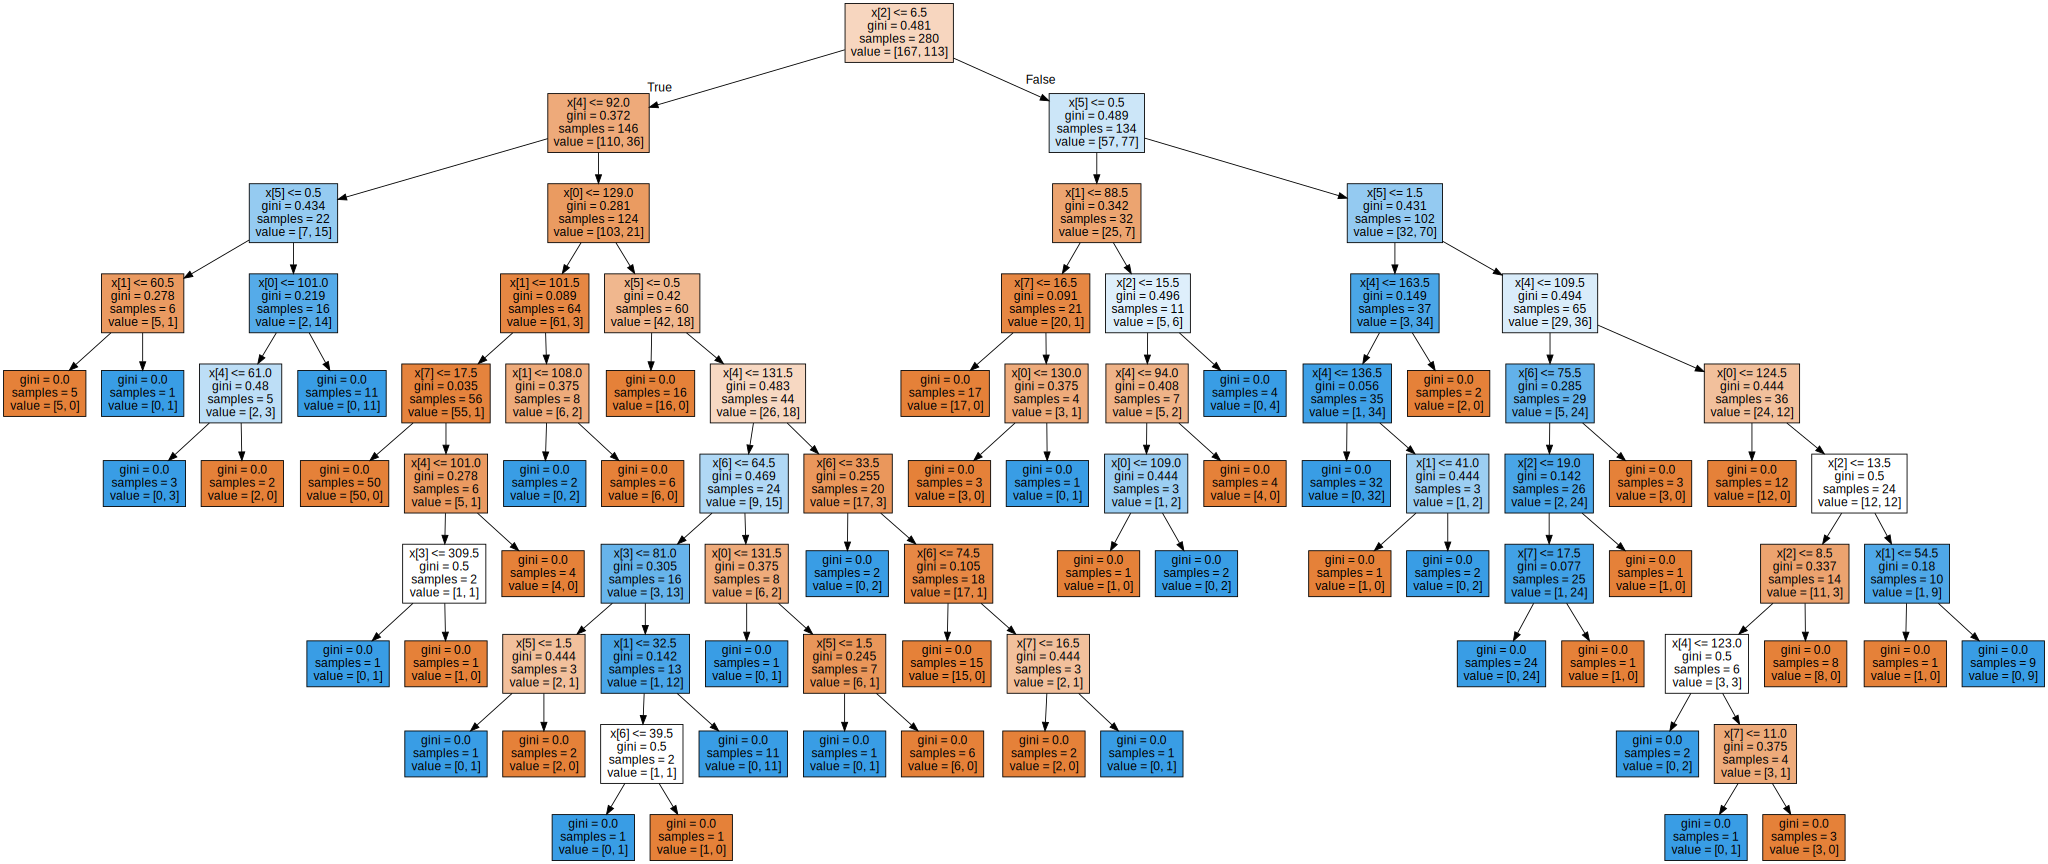

In [36]:
from sklearn import tree
import graphviz
dot_data= tree.export_graphviz(dtc,filled= True)
graph=graphviz.Source(dot_data)
graph
